In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset=pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
columns_indices_to_drop = [3, 8, 11]
dataset= dataset.drop(dataset.columns[columns_indices_to_drop], axis=1)

In [5]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split as tts 
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=54)

In [7]:
from sklearn.preprocessing import StandardScaler as ss
sc=ss()
x_train[:,:]=sc.fit_transform(x_train[:,:])
x_test[:,:]=sc.transform(x_test[:,:])
y_train=sc.fit_transform(y_train[:].reshape(-1,1))
y_test=sc.fit_transform(y_test[:].reshape(-1,1))

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
# define the decision tree regressor
regressor = DecisionTreeRegressor()

In [10]:
# define the hyperparameters to be tuned
params = {'max_depth': [2, 4, 6, 8, 10], 
          'min_samples_split': [2, 4, 6, 8, 10],
          'min_samples_leaf': [1, 2, 3, 4, 5],
          'max_features': [1.0, None]}

In [11]:
# define the scoring function
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [12]:
# define the grid search with 5-fold cross validation
grid_search = GridSearchCV(estimator=regressor, param_grid=params, scoring=scorer, cv=5)

In [13]:
# fit the grid search to the data
grid_search.fit(x_train, y_train)
# print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 8}


In [14]:
# get the best decision tree regressor with the tuned hyperparameters
regressor_best = grid_search.best_estimator_

In [15]:
# predict the target variable using the best model
y_pred = regressor_best.predict(x_test)
np.set_printoptions(precision=2)
y_pred=sc.inverse_transform(y_pred.reshape(-1,1))
y_test=sc.inverse_transform(y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 9.8   9.8 ]
 [ 9.8   9.6 ]
 [10.68 10.  ]
 [ 9.55  9.5 ]
 [10.32 10.2 ]
 [10.32 11.  ]
 [ 9.89  9.7 ]
 [ 9.89  9.5 ]
 [10.81 10.6 ]
 [10.97 10.3 ]
 [10.14  9.9 ]
 [10.32  9.6 ]
 [ 9.21 11.1 ]
 [11.68 11.1 ]
 [10.19 12.7 ]
 [ 9.53  9.3 ]
 [11.68 11.2 ]
 [10.57  9.7 ]
 [10.57 11.2 ]
 [11.39 11.6 ]
 [13.04 12.1 ]
 [ 9.8  10.1 ]
 [10.68 11.1 ]
 [11.39 11.1 ]
 [10.81  9.6 ]
 [ 9.8  11.2 ]
 [11.61  9.4 ]
 [13.1  13.57]
 [10.95 11.6 ]
 [10.68  9.8 ]
 [12.19 12.8 ]
 [10.81 11.7 ]
 [10.32 10.8 ]
 [10.19  9.2 ]
 [14.   14.  ]
 [13.12 12.3 ]
 [10.32 10.4 ]
 [11.61 10.6 ]
 [ 9.53 10.  ]
 [ 9.8  10.1 ]
 [ 9.8  10.6 ]
 [10.68 11.  ]
 [ 9.89  9.9 ]
 [10.19 11.7 ]
 [10.54  9.8 ]
 [ 9.67  9.3 ]
 [11.39 10.1 ]
 [10.81 10.  ]
 [ 9.8   9.2 ]
 [ 9.53  9.1 ]
 [ 9.89  9.4 ]
 [ 9.44 10.  ]
 [10.19 10.9 ]
 [11.68 11.3 ]
 [12.   11.2 ]
 [11.39 11.1 ]
 [ 9.8   9.5 ]
 [10.57  9.2 ]
 [ 9.67  9.5 ]
 [10.22 11.3 ]
 [10.32 10.8 ]
 [10.37 10.5 ]
 [10.02  9.4 ]
 [ 9.53  9.7 ]
 [ 9.53  9.4 ]
 [10.32  9.2 ]
 [10.57 10

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.4972923527301954
R2 Score: 0.588999022751566


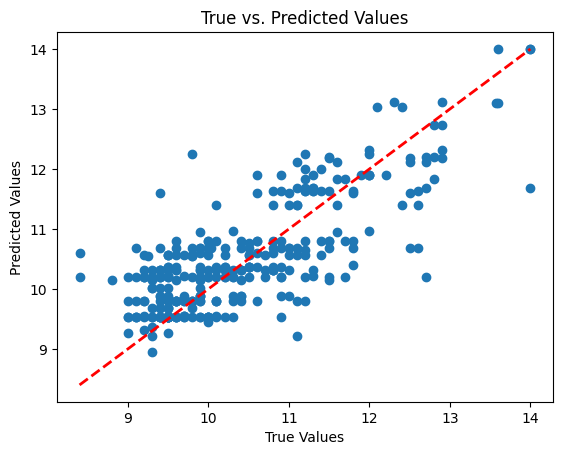

In [17]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

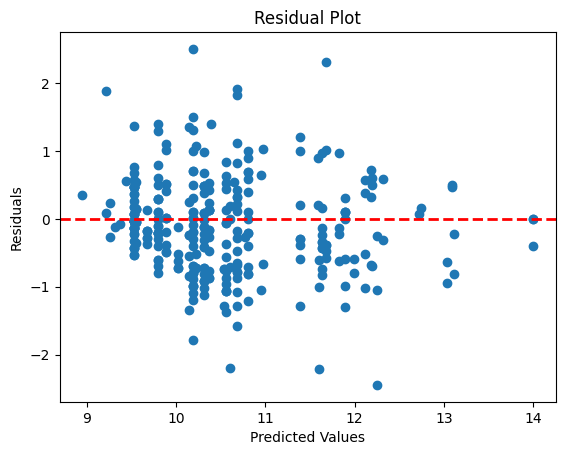

In [18]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

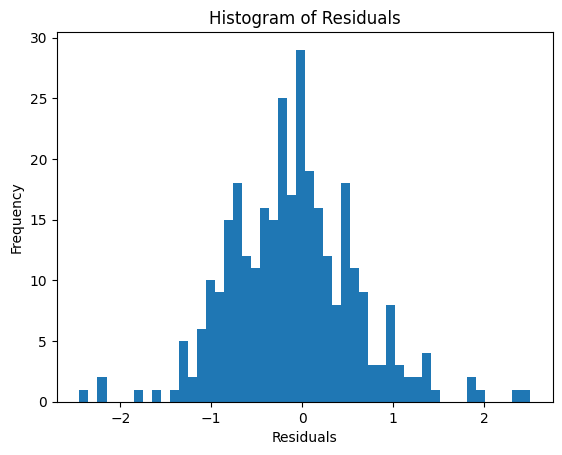

In [19]:
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()